선형회귀
==
- 선형회귀 함수사용
- 경사하강법 동작 이해

## 선형회귀 함수 사용법

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

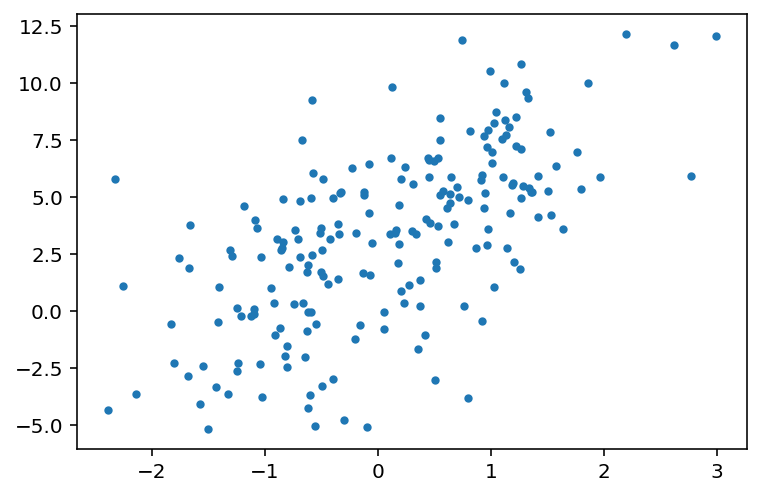

In [35]:
n_samples = 200
x = np.random.randn(n_samples) ;x # x 생성
# 계수 및 절편
w = 2
b = 3
# 노이지 추가
y = w*x + b  + 3* np.random.randn(n_samples) # 실제 y 값 생성
plt.scatter(x,y, s=10)

In [36]:
np.corrcoef(x,y)

array([[1.       , 0.6301922],
       [0.6301922, 1.       ]])

In [19]:
x

array([ 0.46378095, -2.56249129, -0.76541595,  0.49619115,  1.89755403])

In [22]:
x.reshape(-1,1)

array([[ 0.46378095],
       [-2.56249129],
       [-0.76541595],
       [ 0.49619115],
       [ 1.89755403]])

In [37]:
from sklearn.linear_model import LinearRegression
leg = LinearRegression() # (1) 모델 생성
leg.fit(x.reshape(-1,1), y) # (2) 학습

print(leg.coef_) # w
print(leg.intercept_) # b

[2.32825447]
3.052981702907528


## 모델을 예측에 사용하기

In [25]:
leg.predict([[1],[5],[10]]) # (3) 모델 사용(회귀, 분류) inference

array([ 5.03349737, 13.14812452, 23.29140846])

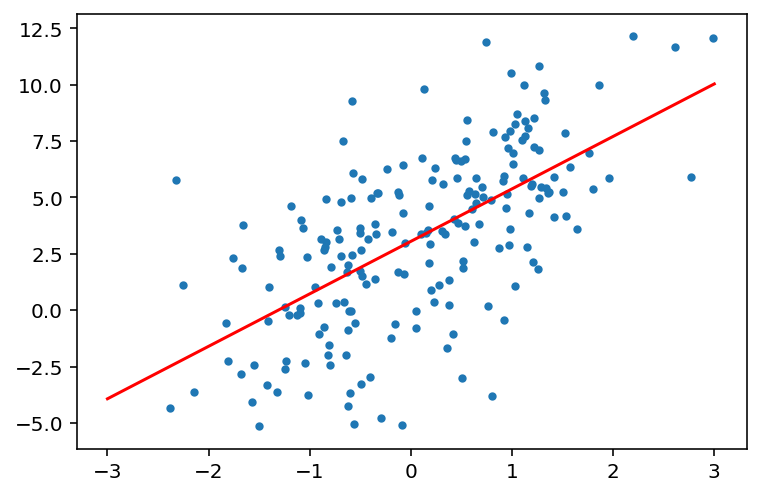

In [46]:
a, b = leg.coef_ , leg.intercept_
xs = np.linspace(-3,3,2)
ys = a*xs + b
plt.plot(xs,ys, c='r')
plt.scatter(x,y, s=10)

## 경사하강법 구현

변수가 1개인 경우
--

In [49]:
num_epoch = 10
lr = 1 # 하이퍼파라미터

w = np.random.uniform()
b = np.random.uniform()
print(w,b)

for epoch in range(num_epoch): # 경사하강법 구현
    y_pred = w*x + b
    e = y_pred - y
    error = np.abs(e).mean()
    print(f"{epoch:2} w = {w:.3f}, b = {b:.3f}, error = {error:.3f}")

    w = w - lr*(e* x).mean()
    b = b - lr*e.mean()

0.2097821114498839 0.16290070325096406
 0 w = 0.210, b = 0.163, error = 4.020
 1 w = 7.690, b = 9.303, error = 7.576
 2 w = -11.004, b = -10.635, error = 16.637
 3 w = 35.070, b = 33.386, error = 38.502
 4 w = -77.355, b = -64.871, error = 89.704
 5 w = 194.944, b = 156.568, error = 210.635
 6 w = -460.907, b = -346.682, error = 495.690
 7 w = 1112.082, b = 805.227, error = 1168.223
 8 w = -2648.352, b = -1847.337, error = 2755.726
 9 w = 6319.008, b = 4291.514, error = 6505.296


변수가 2개인 경우
--

In [25]:
n_samples = 200
x1 = np.random.randn(n_samples)
x2 = np.random.randn(n_samples)

y = 2 * x1 + 3 * x2 + 4  + 0.1*np.random.randn(n_samples)

leg = LinearRegression()
X = pd.DataFrame({'x1':x1, 'x2':x2})
leg.fit(X, y)

print(leg.coef_)
print(leg.intercept_)

[2.00292017 3.00729847]
4.007862653796171


In [26]:
leg.score(X,y) # R square

0.9992969810326712

경사하강법
--

In [27]:
num_epoch = 10
lr = 0.1

w1 = np.random.uniform()
w2 = np.random.uniform()
b = np.random.uniform()

for epoch in range(num_epoch):
    y_pred = w1*x1 + w2*x2 + b
    error = np.abs(y_pred - y).mean()
    print(f"{epoch:2} w1 = {w1:.6f},  w2 = {w2:.6f}, b = {b:.6f} , error = {error:.6f}")

    w1 = w1 - lr*((y_pred - y)* x1).mean()
    w2 = w2 - lr*((y_pred - y)* x2).mean()
    b = b - lr*((y_pred - y)).mean()

 0 w1 = 0.302660,  w2 = 0.162774, b = 0.746864 , error = 3.848526
 1 w1 = 1.446825,  w2 = 2.288829, b = 2.986388 , error = 1.135650
 2 w1 = 1.820663,  w2 = 2.828957, b = 3.685363 , error = 0.352163
 3 w1 = 1.943090,  w2 = 2.964122, b = 3.905328 , error = 0.131716
 4 w1 = 1.983255,  w2 = 2.997233, b = 3.975063 , error = 0.085294
 5 w1 = 1.996450,  w2 = 3.005093, b = 3.997315 , error = 0.079505
 6 w1 = 2.000790,  w2 = 3.006868, b = 4.004455 , error = 0.078576
 7 w1 = 2.002218,  w2 = 3.007236, b = 4.006758 , error = 0.078387
 8 w1 = 2.002689,  w2 = 3.007299, b = 4.007503 , error = 0.078340
 9 w1 = 2.002844,  w2 = 3.007304, b = 4.007745 , error = 0.078327
